### Linear classifier with Adam

A linear classifier is a model that makes its predictions based on a linear predictor function combining a set of weights with the feature vector. The linear classifier can be trained using stochastic gradient descent (Adam), which is an iterative method for optimizing an objective function.

Using the NeuralNetwork class, we define a linear classifier with a single layer. The model will be trained on the MNIST dataset, which consists of handwritten digits. The goal is to classify the images into one of 10 classes (0-9).

In [1]:
import matplotlib.pyplot as plt
import os.path
import numpy as np
import sys
sys.path.append('../..') # Adds the parent directory to the path

from Data import DatasetClasses

from Helpers.NeuralNetwork import NeuralNetwork

from Helpers import Helpers
from Layers.FullyConnected import FullyConnected
from Layers.Activations import SoftMax
from Layers.Flatten import Flatten
from Layers.Initializers import He, Constant, UniformRandom

from Optimization.Optimizers import Adam
from Optimization.Loss import CrossEntropyLoss
from Optimization.Constraints import L2_Regularizer

### Dataset


dataset Informations:
--------------------------------------------------
Training samples: 45500
Sample shape: (1, 28, 28)
Number of classes: 10
Test samples: 14000
Dataset size in memory: 355.90 MB


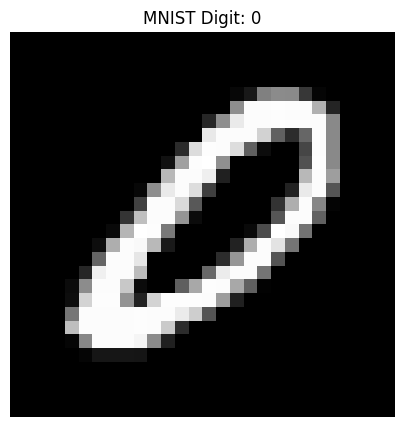

In [2]:
batch_size = 100
mnist = DatasetClasses.MNISTData(batch_size)
mnist.print_dataset_info()

### Architecture: Linear Classifier

In [3]:
def build_linear_classifier(input_dim, output_dim):
    # Create optimizer and regularizer
    learning_rate = 0.01
    optimizer = Adam(learning_rate)  #could use Sgd (similar results)
    regularizer = L2_Regularizer(alpha=0.001)
    # regulazier = None  (doesn t change much)
    optimizer.add_regularizer(regularizer)
    
    # Initialize the network with He initialization for weights
    weights_initializer = He()
    # weights_initializer = UniformRandom()  (don t change much the results but a lot the vectors)
    bias_initializer = Constant(0.1)  # Small constant for bias initialization
    net = NeuralNetwork(optimizer, weights_initializer, bias_initializer)
    
    # Add layers for linear classifier
    # First flatten the input images (28x28x1) to a vector
    net.append_layer(Flatten())
    
    # Single fully connected layer directly to output classes (linear classifier)
    net.append_layer(FullyConnected(input_dim, output_dim))  # 28*28=784 input, 10 classes output
    
    # SoftMax for converting outputs to probabilities
    net.append_layer(SoftMax())
    
    # Set loss function
    net.loss_layer = CrossEntropyLoss()
    
    return net

### Train and Visualize the Linear Classifier

Loaded existing model


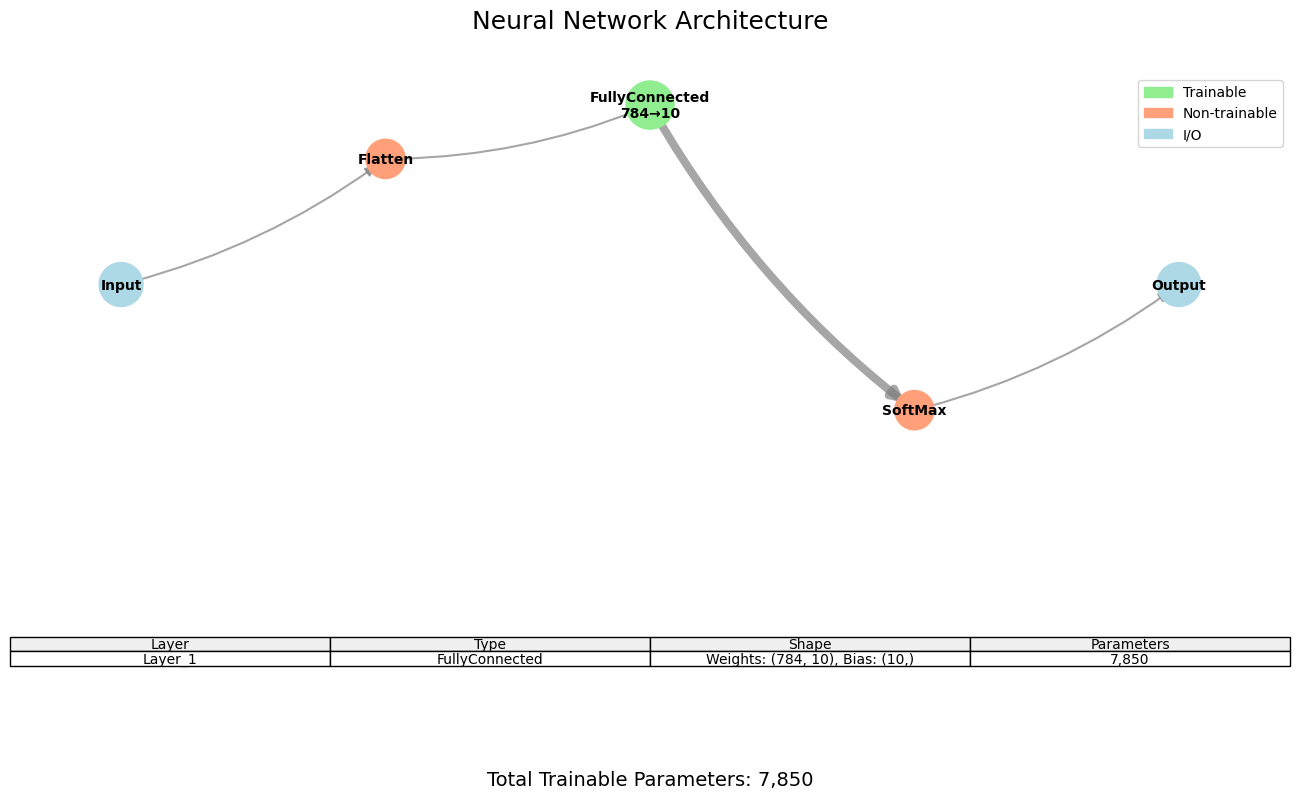

In [4]:
iterations = 500

# Load or build the network
if os.path.isfile(os.path.join('../trained', 'LinearClassifierMNIST_itr'+str(iterations))):
    net = NeuralNetwork.load(os.path.join('../trained', 'LinearClassifierMNIST_itr'+str(iterations)), mnist)
    print("Loaded existing model")
else:
    net = build_linear_classifier(input_dim=784, output_dim=10)
    net.data_layer = mnist
    print("Created new model")

# Visualize the initial network
fig = net.plot()

Détection automatique du type de problème: classification (basé sur CrossEntropyLoss)
Validation set detected and will be used for display.
 Iteration |         Loss |  Train Acc (%) |  Val Acc (%) | Elapsed Time
-----------------------------------------------------------------
         0 |    22.531418 |          92.00 |        92.40 | 0.03s
        10 |    27.956122 |          92.90 |        92.40 | 0.14s
        20 |    19.205376 |          91.90 |        93.10 | 0.36s
        30 |    31.292671 |          92.40 |        91.90 | 0.52s
        40 |    39.346288 |          90.50 |        91.50 | 0.66s
        50 |    22.878361 |          91.60 |        91.90 | 0.75s
        60 |    21.925108 |          92.30 |        91.20 | 0.85s
        70 |    32.734462 |          91.80 |        91.70 | 0.93s
        80 |    29.383269 |          93.70 |        92.70 | 1.02s
        90 |    38.882784 |          91.80 |        92.40 | 1.19s
       100 |    32.049029 |          92.10 |        92.20 | 1

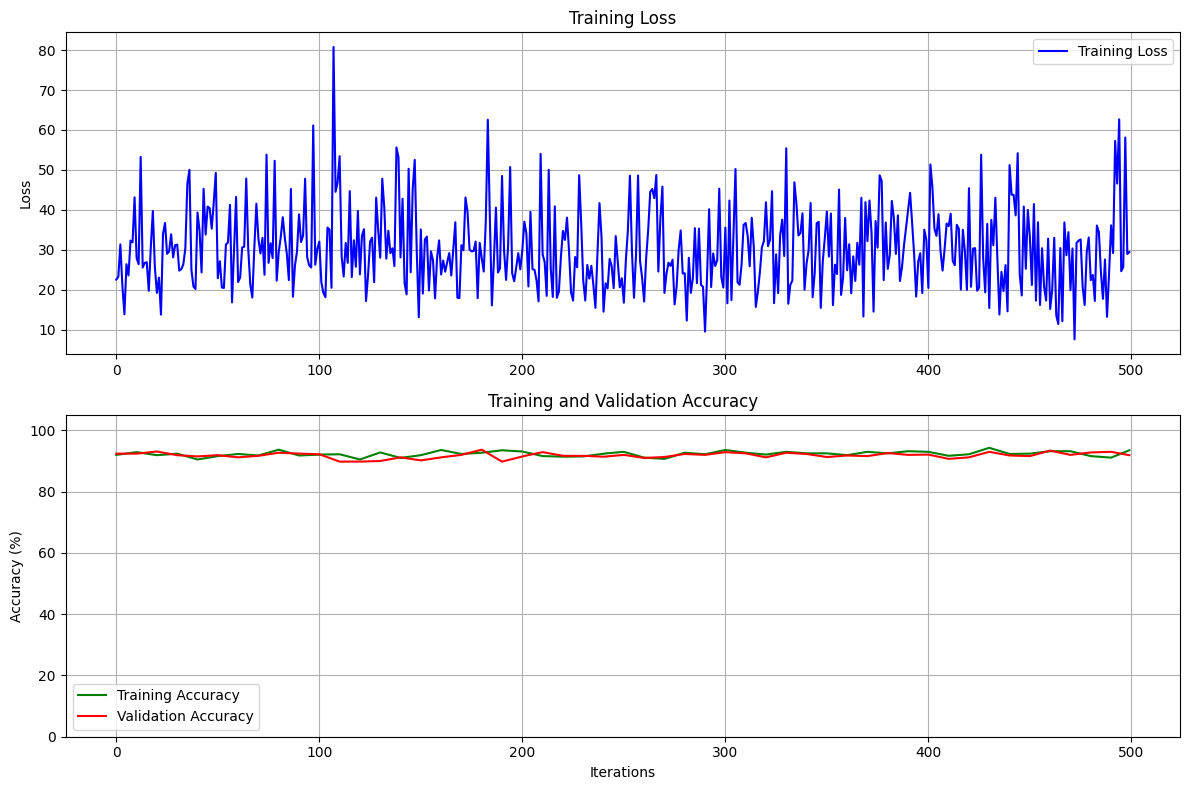

{'loss': [np.float64(22.53141794384458),
  np.float64(23.27030777986976),
  np.float64(31.350642453412622),
  np.float64(20.880036318164844),
  np.float64(13.841068589800653),
  np.float64(26.388998732084467),
  np.float64(23.584150769843035),
  np.float64(32.30362650258611),
  np.float64(31.847730696168224),
  np.float64(43.1352687596418),
  np.float64(27.95612249112423),
  np.float64(26.39101756381195),
  np.float64(53.24735295722707),
  np.float64(25.562584470377985),
  np.float64(26.721944227400883),
  np.float64(26.898686769840396),
  np.float64(19.735465591952348),
  np.float64(30.704802084604484),
  np.float64(39.71274075455064),
  np.float64(25.556413780862403),
  np.float64(19.205375585928696),
  np.float64(23.028949601456684),
  np.float64(13.762318922406733),
  np.float64(33.956175025070955),
  np.float64(36.72293592661773),
  np.float64(28.999110643154694),
  np.float64(29.594342218963025),
  np.float64(33.87397917402808),
  np.float64(28.090321658078548),
  np.float64(31.1

In [5]:
# Train the network
net.train(iterations)

### Evaluate on Test Set

In [6]:
# Get the test set 
data, labels = net.data_layer.get_test_set()

# Test the network on the test set
results = net.test(data)
accuracy = Helpers.calculate_accuracy(results, labels)
print('\nOn the MNIST dataset, the linear classifier achieves an accuracy of: ' + str(accuracy * 100) + '%')


On the MNIST dataset, the linear classifier achieves an accuracy of: 91.77857142857142%


### Visualize Weights

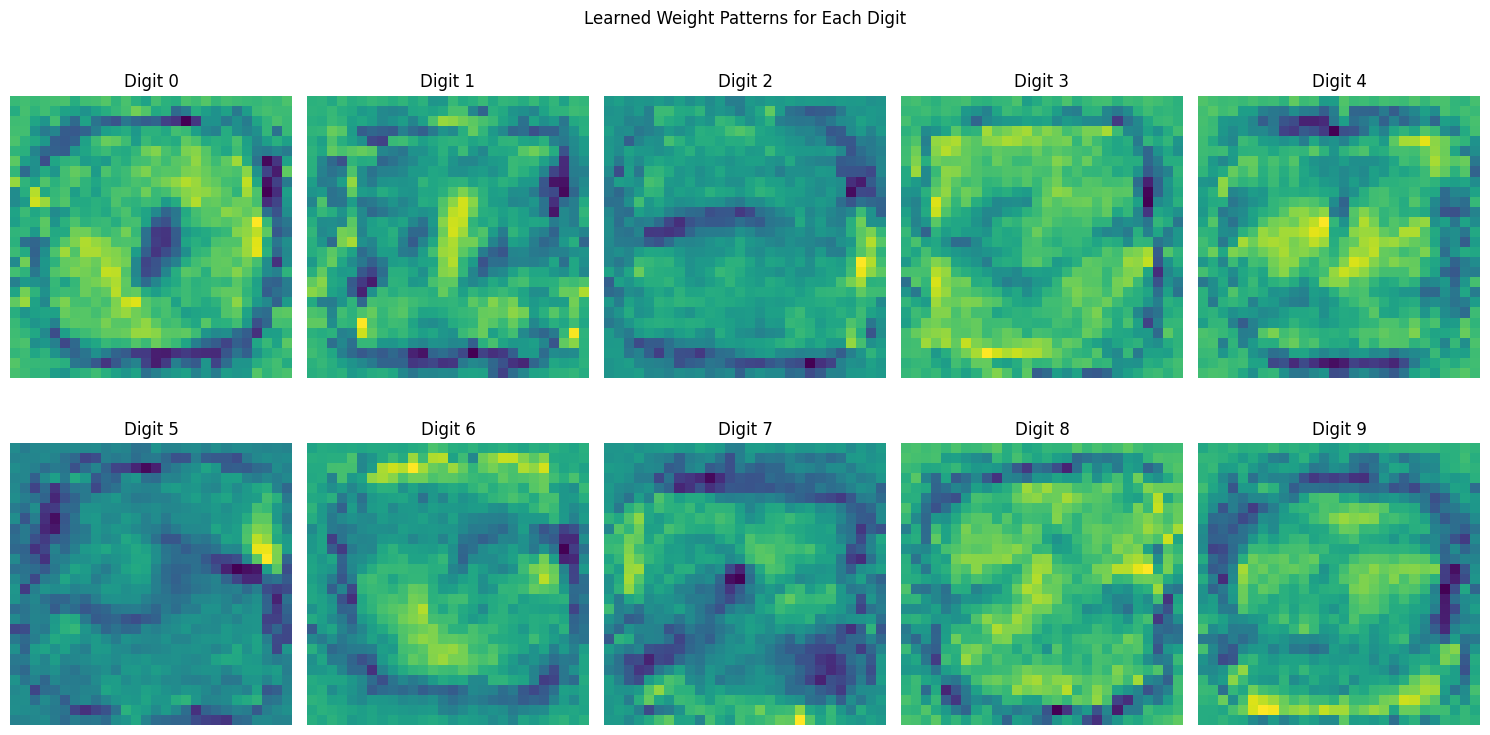

In [7]:
# Visualize the learned weights for each digit
fc_layer = net.layers[1]  # The FullyConnected layer
weights = fc_layer.weights[:-1, :]  # Exclude bias row

plt.figure(figsize=(15, 8))
for i in range(10):
    plt.subplot(2, 5, i+1)
    # Reshape the weights to 28x28 image dimensions
    weight_img = weights[:, i].reshape(28, 28)
    plt.imshow(weight_img, cmap='viridis')
    plt.title(f'Digit {i}')
    plt.axis('off')
plt.suptitle('Learned Weight Patterns for Each Digit')
plt.tight_layout()
plt.show()

In [8]:
# Save the trained model
os.makedirs('../trained', exist_ok=True)
NeuralNetwork.save(os.path.join('../trained', 'LinearClassifierMNIST_itr'+str(iterations)), net)
print("Model saved")

Model saved


### Same with random data class


dataset Informations:
--------------------------------------------------
Training samples: 100
Sample shape: (100,)
Number of classes: 4
Test samples: 20
Dataset size in memory: 0.09 MB


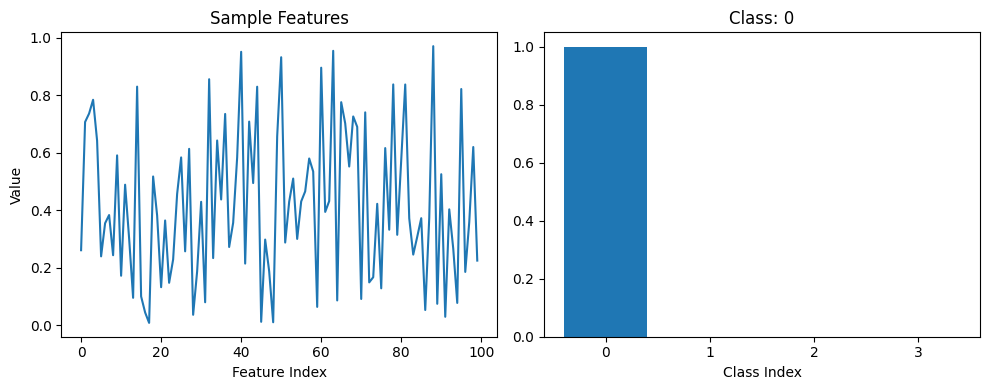

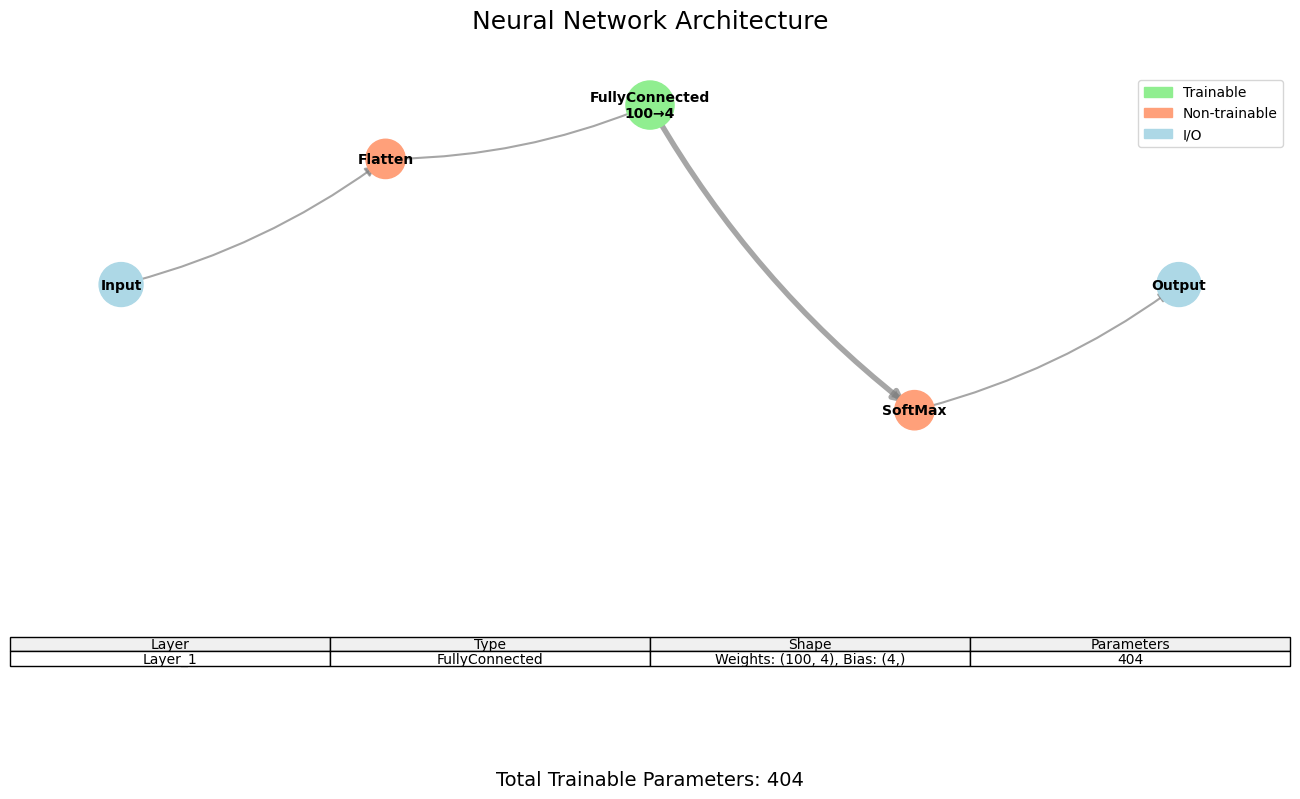

Détection automatique du type de problème: classification (basé sur CrossEntropyLoss)
Validation set detected and will be used for display.
 Iteration |         Loss |  Train Acc (%) |  Val Acc (%) | Elapsed Time
-----------------------------------------------------------------
         0 |    61.407159 |          22.00 |        22.80 | 0.02s
        10 |    41.018807 |          18.00 |        27.40 | 0.02s
        20 |    46.055344 |          22.00 |        24.00 | 0.03s
        30 |    46.739575 |          18.00 |        27.10 | 0.03s
        40 |    44.546165 |          22.00 |        24.50 | 0.03s
        50 |    42.230964 |          19.00 |        26.70 | 0.04s
        60 |    42.401522 |          20.00 |        26.70 | 0.04s
        70 |    41.119759 |          19.00 |        25.60 | 0.05s
        80 |    46.238312 |          24.00 |        23.70 | 0.05s
        90 |    41.748794 |          22.00 |        25.50 | 0.05s
       100 |    44.129182 |          20.00 |        24.40 | 0

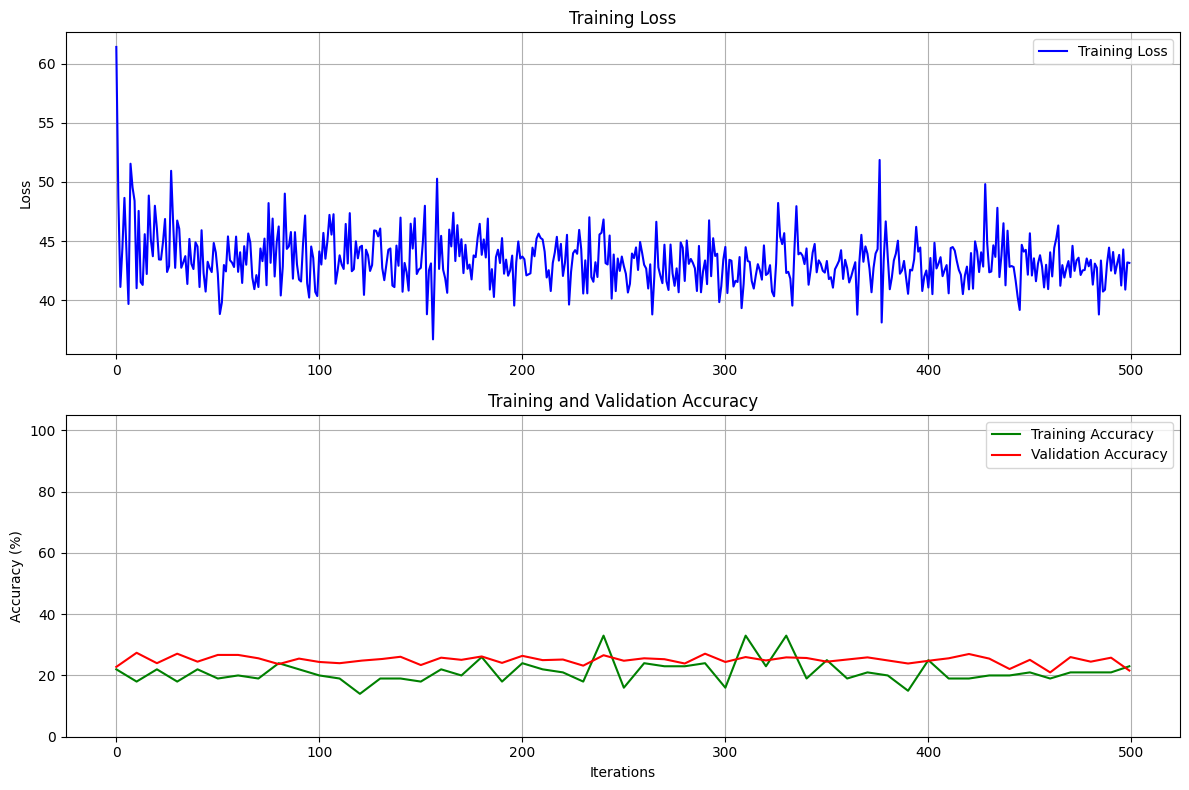

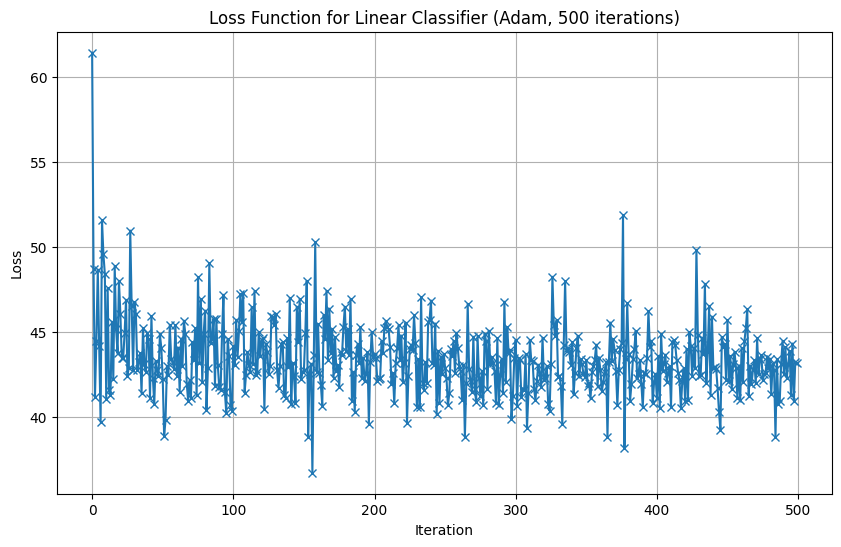


On the random dataset, the linear classifier achieves an accuracy of: 10.0%


In [9]:
randomdata = DatasetClasses.RandomData(input_size=100, batch_size=30, categories=4, training_size=100, validation_size=1000)
randomdata.print_dataset_info()

iterations = 500

net = build_linear_classifier(input_dim=100, output_dim=4)  #we expect 0.25 accuracy for random data
net.data_layer = randomdata

# Visualize the initial network
fig = net.plot()

# Train the network
net.train(iterations)

# Plot the loss curve
plt.figure(figsize=(10, 6))
plt.plot(net.loss, '-x')
plt.title(f'Loss Function for Linear Classifier (Adam, {iterations} iterations)')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# Get the test set 
data, labels = net.data_layer.get_test_set()

# Test the network on the test set
results = net.test(data)
accuracy = Helpers.calculate_accuracy(results, labels)
print('\nOn the random dataset, the linear classifier achieves an accuracy of: ' + str(accuracy * 100) + '%')

### Doing the same with Cifar data class




dataset Informations:
--------------------------------------------------
Training samples: 39000
Sample shape: (3, 32, 32)
Number of classes: 10
Test samples: 12000
Dataset size in memory: 597.66 MB


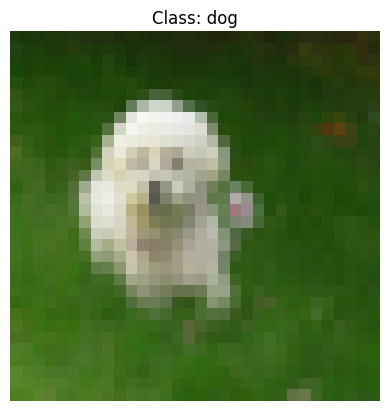

Created new model


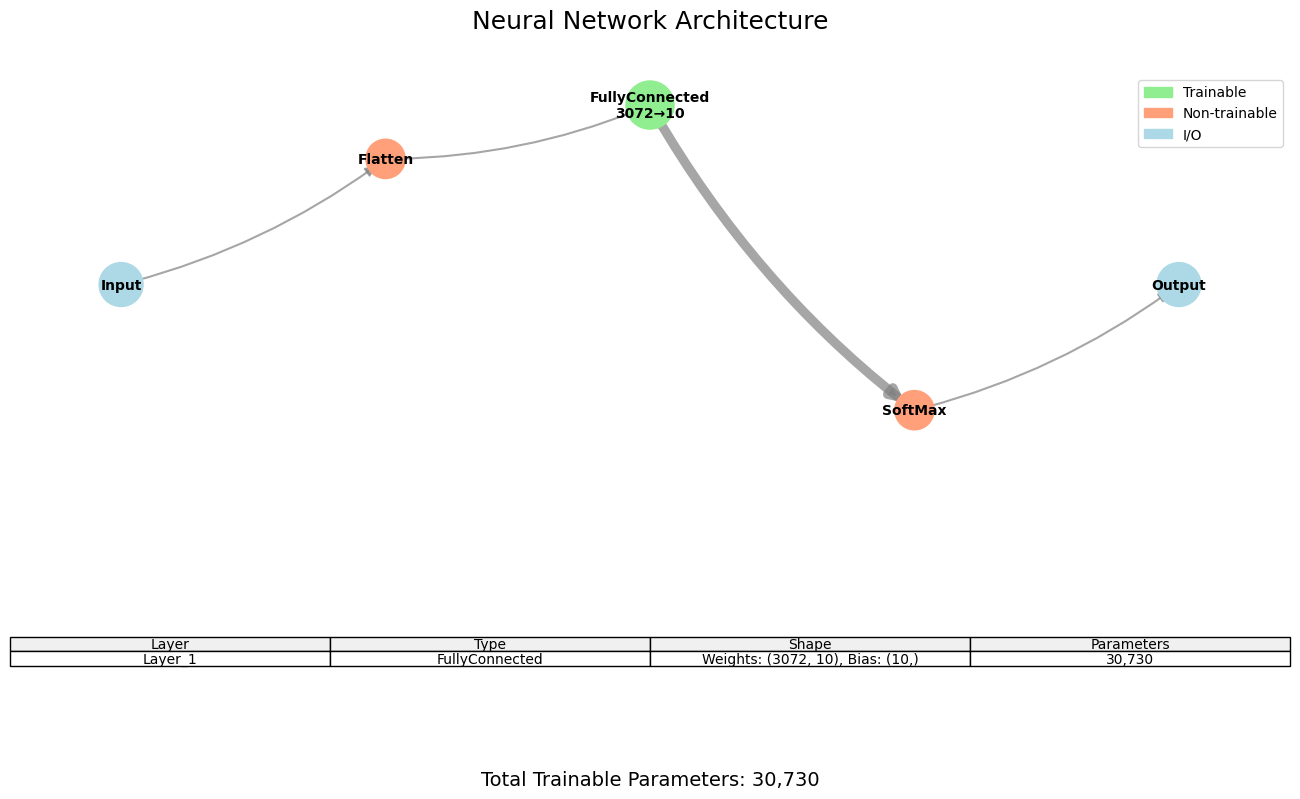

Détection automatique du type de problème: classification (basé sur CrossEntropyLoss)
Validation set detected and will be used for display.
 Iteration |         Loss |  Train Acc (%) |  Val Acc (%) | Elapsed Time
-----------------------------------------------------------------
         0 |   255.222211 |           7.80 |        11.30 | 0.03s
        10 |  2314.703619 |          11.10 |         9.60 | 0.37s
        20 |  1556.835191 |          15.70 |        15.50 | 0.55s
        30 |  1421.819391 |          17.00 |        18.10 | 0.76s
        40 |  1136.100810 |          20.10 |        20.70 | 1.03s
        50 |   904.803237 |          22.50 |        17.40 | 1.43s
        60 |   590.733567 |          22.40 |        23.30 | 1.66s
        70 |   458.623702 |          28.00 |        26.00 | 1.88s
        80 |   314.450909 |          23.00 |        22.70 | 2.07s
        90 |   255.542452 |          29.20 |        26.80 | 2.24s
       100 |   276.856218 |          24.30 |        24.40 | 2

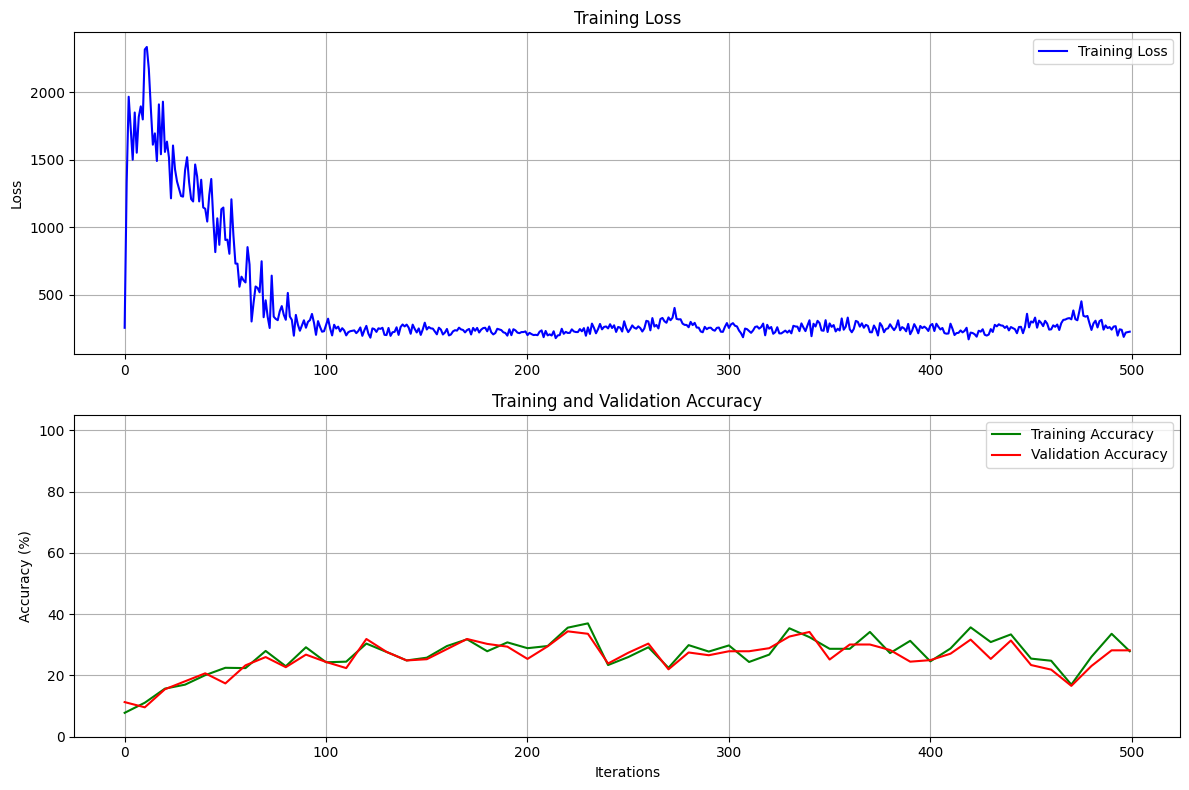

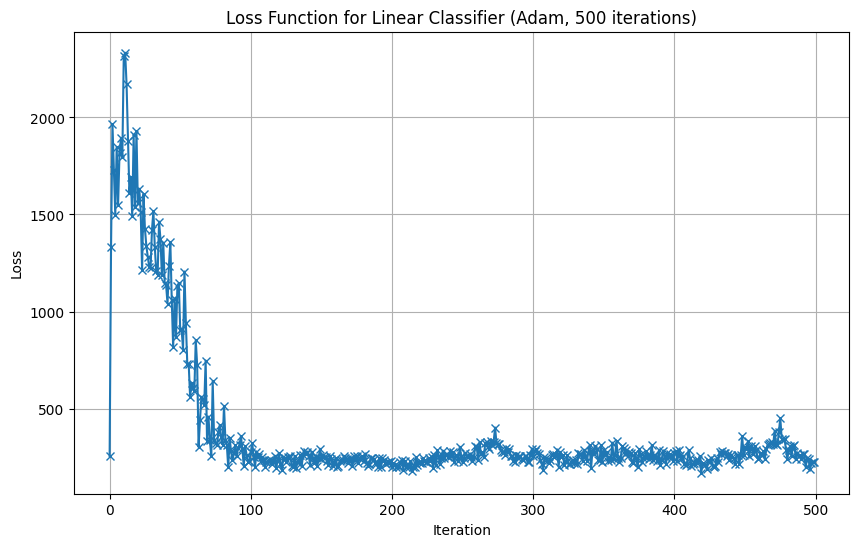


On the CIFAR dataset, the linear classifier achieves an accuracy of: 26.974999999999998%


In [10]:
cifar = DatasetClasses.CifarData(100)
cifar.print_dataset_info()

iterations = 500

# Load or build the network
if os.path.isfile(os.path.join('../trained', 'LinearClassifierCifar_itr'+str(iterations))):
    net = NeuralNetwork.load(os.path.join('../trained', 'LinearClassifierCifar_itr'+str(iterations)), cifar)
    print("Loaded existing model")
else:
    net = build_linear_classifier(input_dim=3*32*32, output_dim=10)
    net.data_layer = cifar
    print("Created new model")

# Visualize the initial network
fig = net.plot()

# Train the network
net.train(iterations)

# Plot the loss curve
plt.figure(figsize=(10, 6))
plt.plot(net.loss, '-x')
plt.title(f'Loss Function for Linear Classifier (Adam, {iterations} iterations)')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# Get the test set 
data, labels = net.data_layer.get_test_set()

# Test the network on the test set
results = net.test(data)
accuracy = Helpers.calculate_accuracy(results, labels)
print('\nOn the CIFAR dataset, the linear classifier achieves an accuracy of: ' + str(accuracy * 100) + '%')

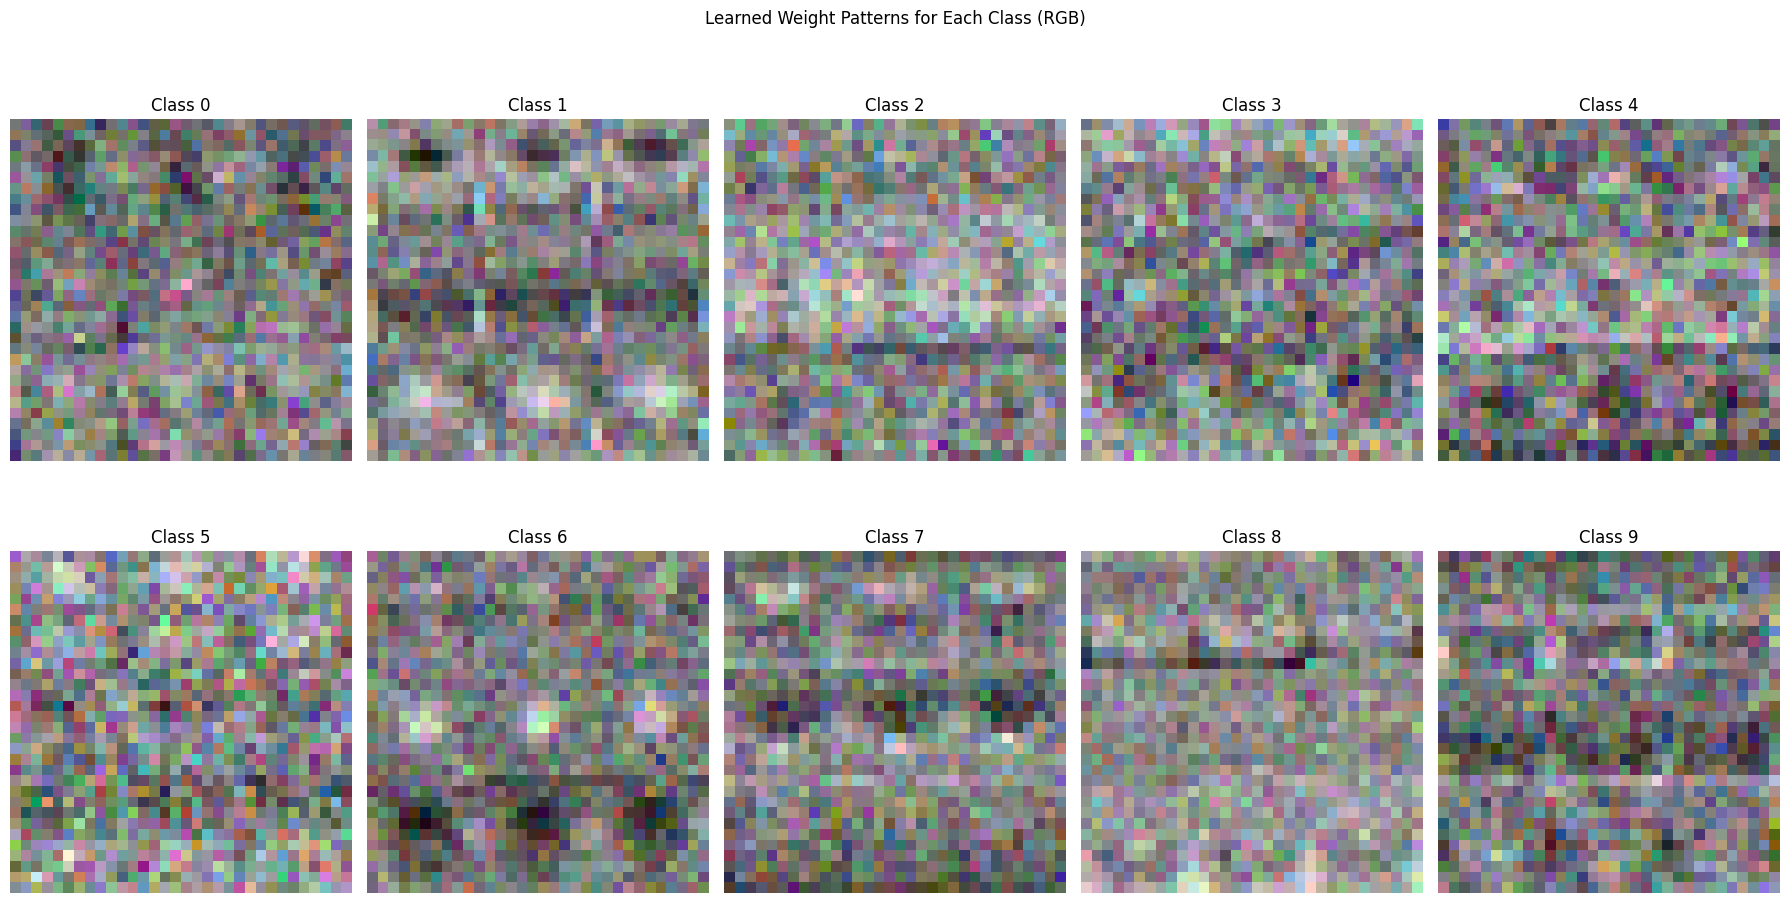

In [11]:
# Visualize the learned weights for each class (for RGB images)
fc_layer = net.layers[1]  # The FullyConnected layer
weights = fc_layer.weights[:-1, :]  # Exclude bias row

# weights shape should be (32*32*3, 10)
plt.figure(figsize=(18, 10))
for i in range(10):
    plt.subplot(2, 5, i+1)
    # Reshape the weights into (32, 32, 3) for RGB images
    weight_img = weights[:, i].reshape(32, 32, 3)
    
    # Normalize for better visualization
    weight_img = (weight_img - weight_img.min()) / (weight_img.max() - weight_img.min())
    
    plt.imshow(weight_img)
    plt.title(f'Class {i}')
    plt.axis('off')

plt.suptitle('Learned Weight Patterns for Each Class (RGB)')
plt.tight_layout()
plt.show()

### Doing the same with caltech data class


dataset Informations:
--------------------------------------------------
Training samples: 5943
Sample shape: (3, 32, 32)
Number of classes: 102
Test samples: 1830
Dataset size in memory: 182.18 MB


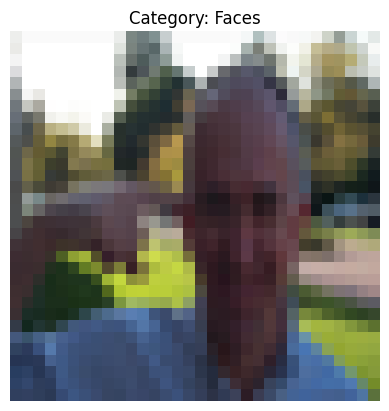

Created new model


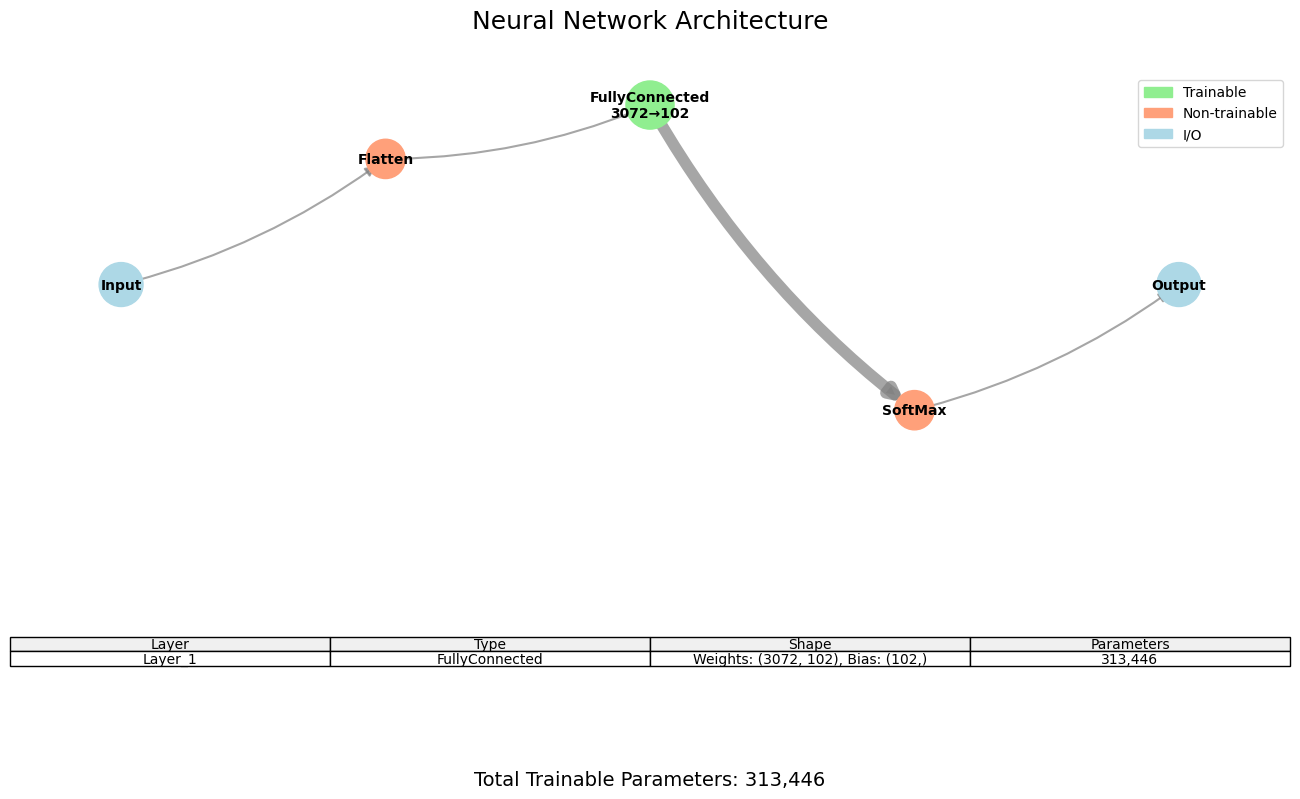

Détection automatique du type de problème: classification (basé sur CrossEntropyLoss)
Validation set detected and will be used for display.
 Iteration |         Loss |  Train Acc (%) |  Val Acc (%) | Elapsed Time
-----------------------------------------------------------------
         0 |   160.434220 |           0.50 |         1.00 | 0.03s
        10 |   853.771262 |           3.80 |         3.70 | 0.36s
        20 |   841.004374 |           5.20 |         6.00 | 0.71s
        30 |   876.523386 |          17.40 |        19.10 | 1.03s
        40 |   992.014613 |          10.30 |         9.70 | 1.35s
        50 |   835.244241 |          18.00 |        17.40 | 1.67s
        60 |   837.996520 |          18.10 |        16.30 | 1.98s
        70 |   746.991658 |          10.70 |        11.50 | 2.30s
        80 |   749.257492 |          22.30 |        22.50 | 2.62s
        90 |   586.478530 |          20.60 |        19.00 | 2.94s
       100 |   568.592355 |          19.20 |        20.30 | 3

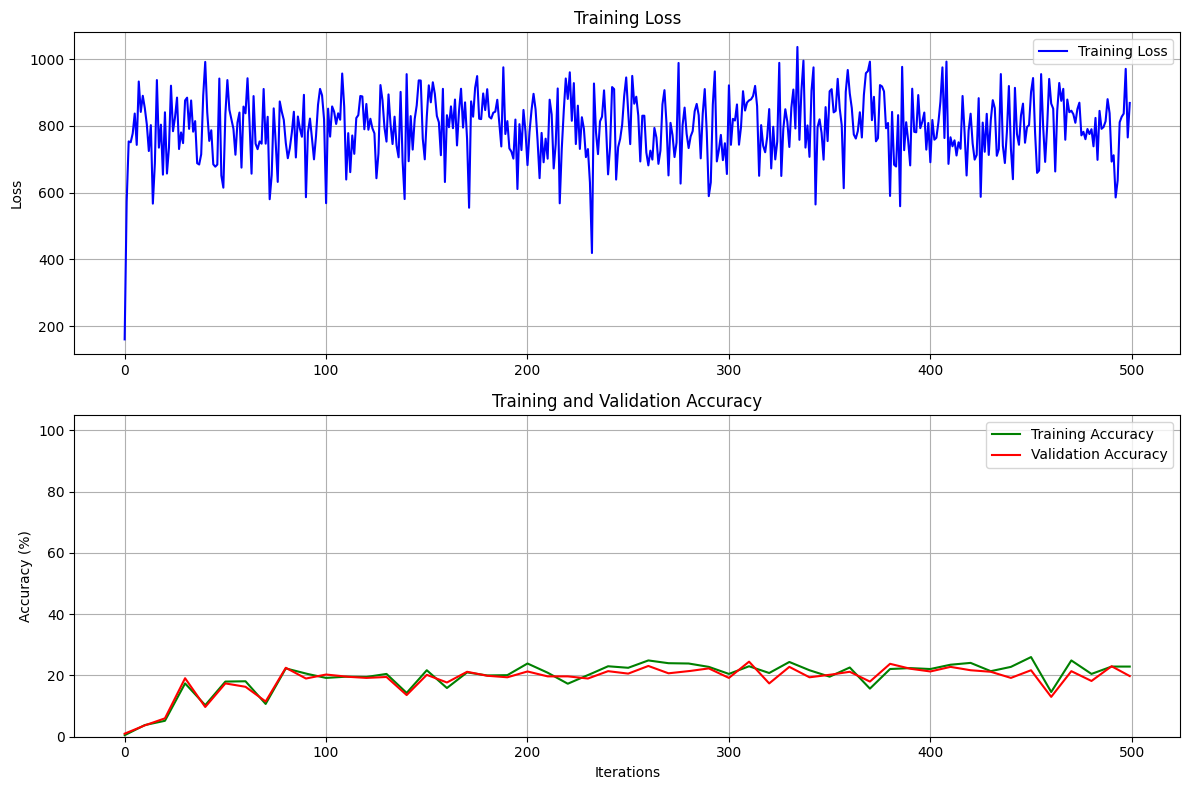

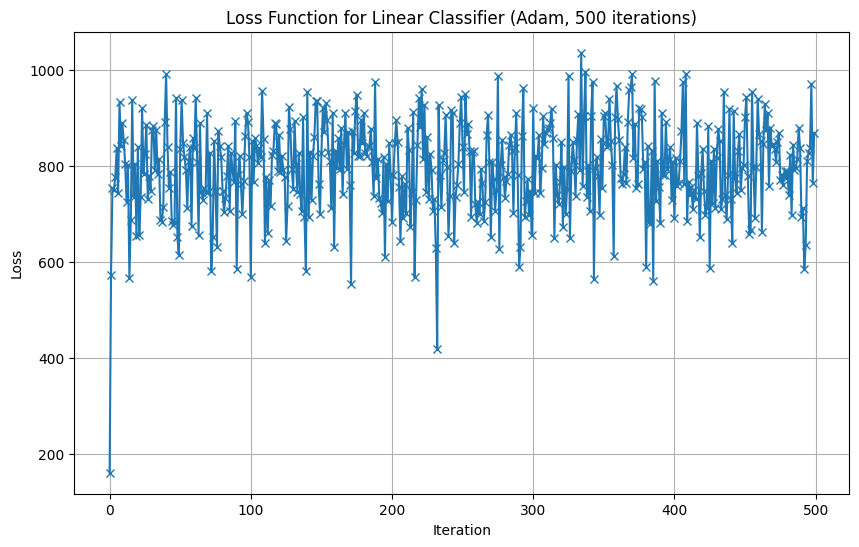


On the Caltech dataset, the linear classifier achieves an accuracy of: 21.147540983606557%


In [12]:
caltech = DatasetClasses.CaltechData(batch_size=32, image_size=(32, 32))
caltech.print_dataset_info()

iterations = 500

# Load or build the network
if os.path.isfile(os.path.join('../trained', 'LinearClassifiercaltech_itr'+str(iterations))):
    net = NeuralNetwork.load(os.path.join('../trained', 'LinearClassifiercaltech_itr'+str(iterations)), caltech)
    print("Loaded existing model")
else:
    net = build_linear_classifier(input_dim=3*32*32, output_dim=102)  # 102 classes output
    net.data_layer = caltech
    print("Created new model")

# Visualize the initial network
fig = net.plot()

# Train the network
net.train(iterations)

# Plot the loss curve
plt.figure(figsize=(10, 6))
plt.plot(net.loss, '-x')
plt.title(f'Loss Function for Linear Classifier (Adam, {iterations} iterations)')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# Get the test set 
data, labels = net.data_layer.get_test_set()

# Test the network on the test set
results = net.test(data)
accuracy = Helpers.calculate_accuracy(results, labels)
print('\nOn the Caltech dataset, the linear classifier achieves an accuracy of: ' + str(accuracy * 100) + '%')

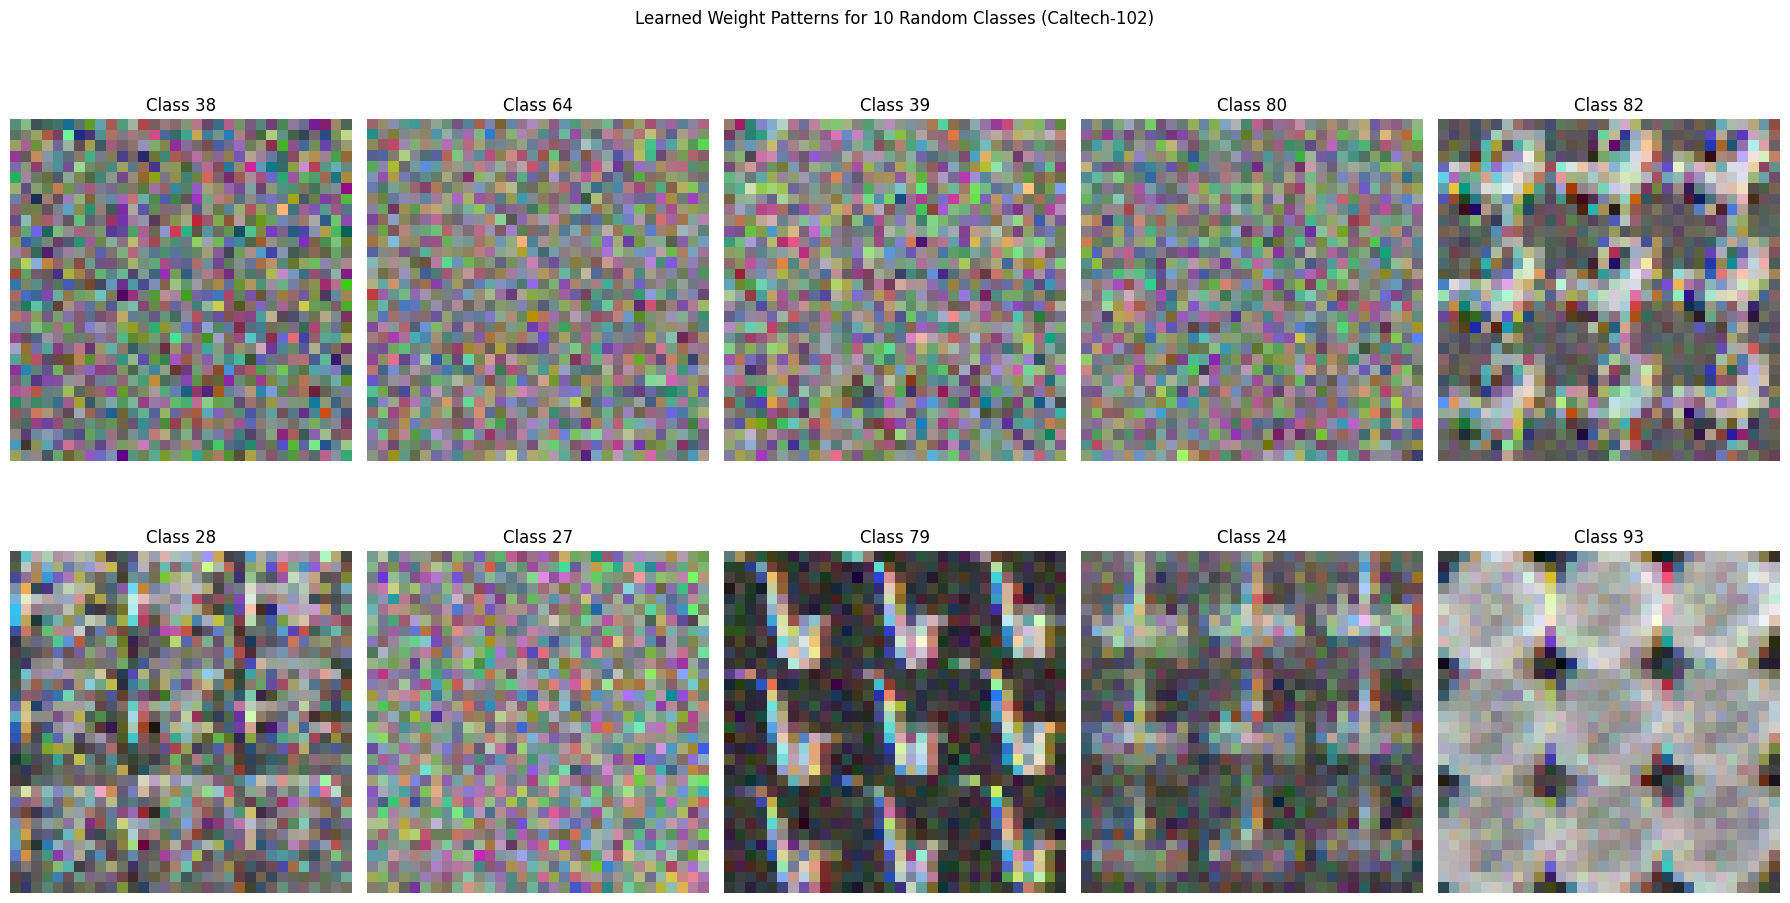

In [13]:
fc_layer = net.layers[1]  # The FullyConnected layer
weights = fc_layer.weights[:-1, :]  # Exclude bias row

# weights shape should be (32*32*3, 102)

# Randomly pick 10 unique classes
random_classes = np.random.choice(102, size=10, replace=False)

plt.figure(figsize=(18, 10))
for idx, class_idx in enumerate(random_classes):
    plt.subplot(2, 5, idx+1)
    
    # Reshape the weights into (32, 32, 3) for RGB images
    weight_img = weights[:, class_idx].reshape(32, 32, 3)
    
    # Normalize for better visualization
    weight_img = (weight_img - weight_img.min()) / (weight_img.max() - weight_img.min())
    
    plt.imshow(weight_img)
    plt.title(f'Class {class_idx}')
    plt.axis('off')

plt.suptitle('Learned Weight Patterns for 10 Random Classes (Caltech-102)')
plt.tight_layout()
plt.show()

### Iris dataset


dataset Informations:
--------------------------------------------------
Training samples: 97
Sample shape: (4,)
Number of classes: 3
Test samples: 31
Dataset size in memory: 0.00 MB


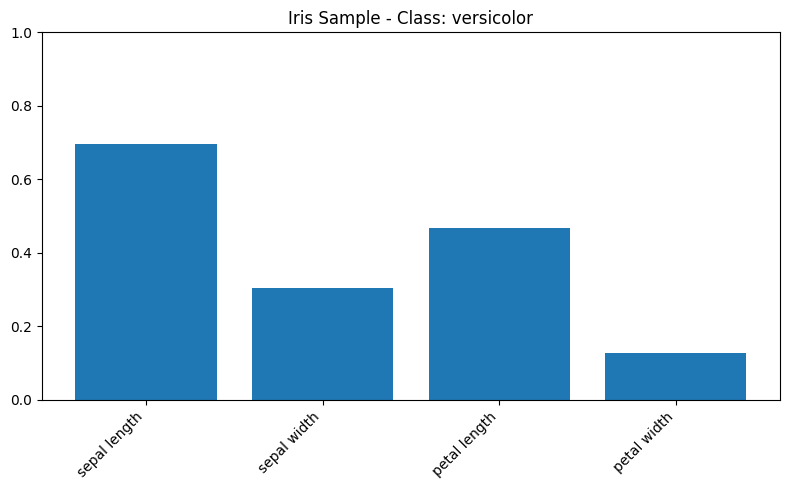

Created new model


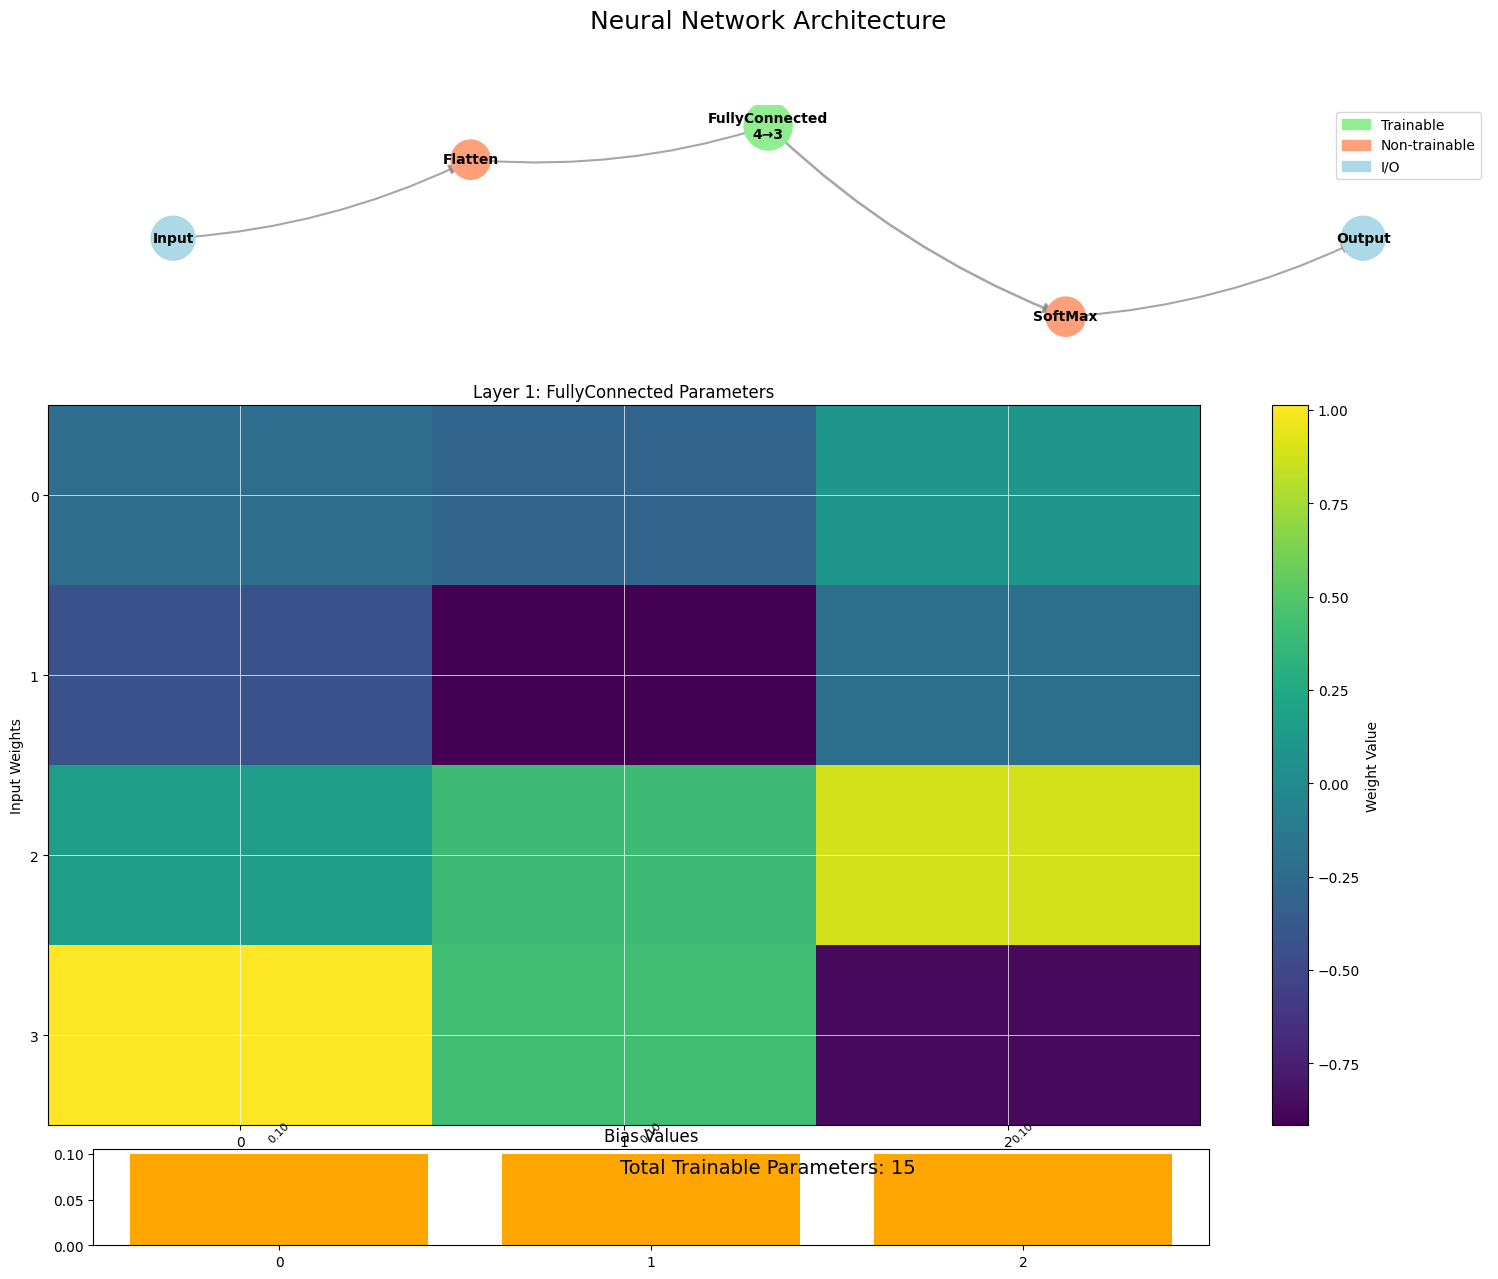

Détection automatique du type de problème: classification (basé sur CrossEntropyLoss)
Validation set detected and will be used for display.
 Iteration |         Loss |  Train Acc (%) |  Val Acc (%) | Elapsed Time
-----------------------------------------------------------------
         0 |   113.396835 |          31.96 |        13.64 | 0.00s
        10 |   107.406136 |          31.96 |        13.64 | 0.00s
        20 |   103.979662 |          69.07 |        86.36 | 0.01s
        30 |   100.960577 |          67.01 |        77.27 | 0.01s
        40 |    98.002627 |          70.10 |        50.00 | 0.01s
        50 |    95.425408 |          71.13 |        50.00 | 0.01s
        60 |    92.682616 |          76.29 |        59.09 | 0.01s
        70 |    90.048028 |          77.32 |        63.64 | 0.01s
        80 |    87.894130 |          77.32 |        59.09 | 0.02s
        90 |    85.783215 |          76.29 |        50.00 | 0.02s
       100 |    83.826495 |          78.35 |        59.09 | 0

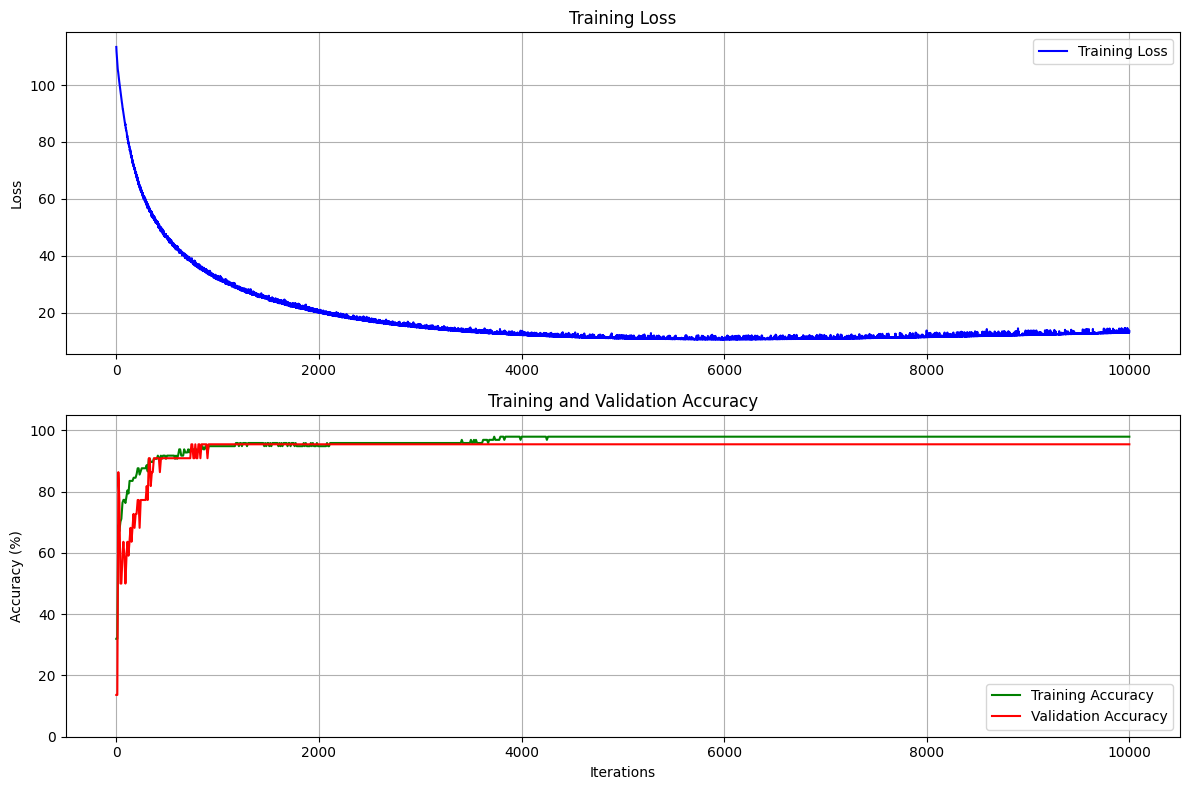

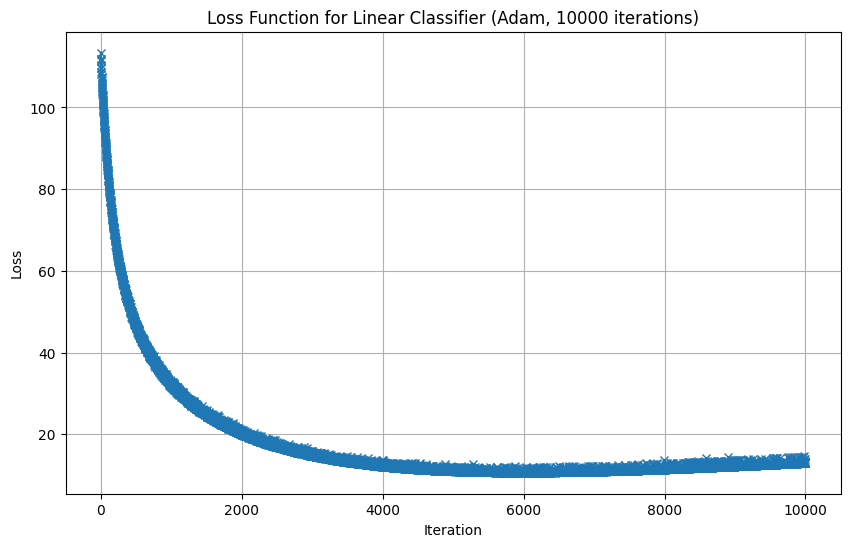


On the iris dataset, the linear classifier achieves an accuracy of: 100.0%


In [14]:
iris = DatasetClasses.IrisData(100)
iris.print_dataset_info()

iterations = 10000

net = build_linear_classifier(input_dim=4, output_dim=3)
net.data_layer = iris
print("Created new model")

# Visualize the initial network
fig = net.plot()

# Train the network
net.train(iterations)

# Plot the loss curve
plt.figure(figsize=(10, 6))
plt.plot(net.loss, '-x')
plt.title(f'Loss Function for Linear Classifier (Adam, {iterations} iterations)')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# Get the test set
data, labels = net.data_layer.get_test_set()

# Test the network on the test set
results = net.test(data)
accuracy = Helpers.calculate_accuracy(results, labels)
print('\nOn the iris dataset, the linear classifier achieves an accuracy of: ' + str(accuracy * 100) + '%')